In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20180510

@author: zhangji
"""

%pylab inline
pylab.rcParams['figure.figsize'] = (18.5, 10.5)

import numpy as np
import pandas as pd
from codeStore import support_fun as spf
import os
import re
import glob
from matplotlib import pyplot as plt
from IPython.display import display, HTML
from scanf import scanf
from io import StringIO
from scipy.io import loadmat, savemat

PWD = os.getcwd()
fontsize = 40
np.set_printoptions(linewidth=110, precision=5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# check convergence1

dir_name1 = 'test_L_ds'
# dir_name2 = 'case1'
dir_name2 = 'case1_v3'
t_dir = os.path.join(PWD, dir_name1, dir_name2)
txt_names = glob.glob('%s/*.txt' % t_dir)

L = []             # pipe length
ds = []            # delta length
nnode = []         # amount of nodes
threshold = []     # cut of threshold
b_list = []        # location of x_f
err = []           # error of velocity

for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'pipe length:'
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    L.append(temp1)
    
    text_headle = 'delta length, epsilon and factor of pipe are'
    temp2 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    ds.append(temp2)
    
    text_headle = 'Stokeslets in pipe prepare, contain '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    nnode.append(temp1)
    
    text_headle = 'threshold of series is '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    threshold.append(temp1)
    
    text_headle = '  b: '
    num_b = int(spf.read_array(text_headle, FILE_DATA, array_length=1)[0])
    text_headle = '                b_list: \n\[ '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=num_b)
    b_list.append(temp1)
    text_headle = '                b -- err          \n'
    t_match = re.search(text_headle, FILE_DATA)
    t1 = t_match.end()
    FILE_DATA_err = FILE_DATA[t1+1:-2]
    t_err = []
    for i0 in np.arange(num_b):
        t0 = re.search('\[', FILE_DATA_err)
        t1 = re.search('\]', FILE_DATA_err)
        t2 = FILE_DATA_err[t0.end():t1.start()]
        t3 = np.loadtxt(StringIO(t2))
        t_err.append(t3)
        FILE_DATA_err = FILE_DATA_err[t1.end():]
    t_err = np.vstack(t_err)
    err.append(t_err)
err = np.vstack(err).T

data_detail = pd.DataFrame({'L': np.hstack(L), 
                    'ds': np.hstack(ds), 
                    'nnode': np.hstack(nnode), 
                    'cth': np.hstack(threshold), })\
        .pivot_table(index=['L', 'ds'])

data_err = pd.DataFrame({'L': np.hstack(np.hstack(L * num_b).reshape(num_b, -1).T), 
                    'ds': np.hstack(np.hstack(ds * num_b).reshape(num_b, -1).T), 
                    'b': err[0], 
                    'x': err[1],  
                    'y': err[2],  
                    'z': err[3], })\
        .pivot_table(index=['L', 'ds'], columns=['b'])
    
# resistance = np.vstack(resistance).T
# data_infhlx = pd.DataFrame({'maxtheta': np.hstack(maxtheta), 
#                     'ntheta_fct': np.hstack(ntheta_fct), 
#                     'nnode': np.hstack(nnode), 
#                     'Fx': resistance[0], 
#                     'Fy': resistance[1], 
#                     'Fz': resistance[2], 
#                     'Tx': resistance[3], 
#                     'Ty': resistance[4], 
#                     'Tz': resistance[5]})\
#         .pivot_table(index=['nnode', 'ntheta_fct'], columns=['maxtheta'])
errx = data_err.x
erry = data_err.y
errz = data_err.z

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    pass
#     display(data_detail)

slope=1.378374 in range (0.03, 0.1)
slope=1.291280 in range (0.03, 0.1)
slope=0.794108 in range (0.03, 0.1)
slope=1.197888 in range (0.03, 0.1)
slope=1.353918 in range (0.03, 0.1)


/home/zhangji/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


slope=-0.695464 in range (2000, 10000)
slope=-0.565859 in range (2000, 10000)
slope=-0.547118 in range (2000, 10000)
slope=-0.595993 in range (2000, 10000)
slope=-0.683559 in range (2000, 10000)


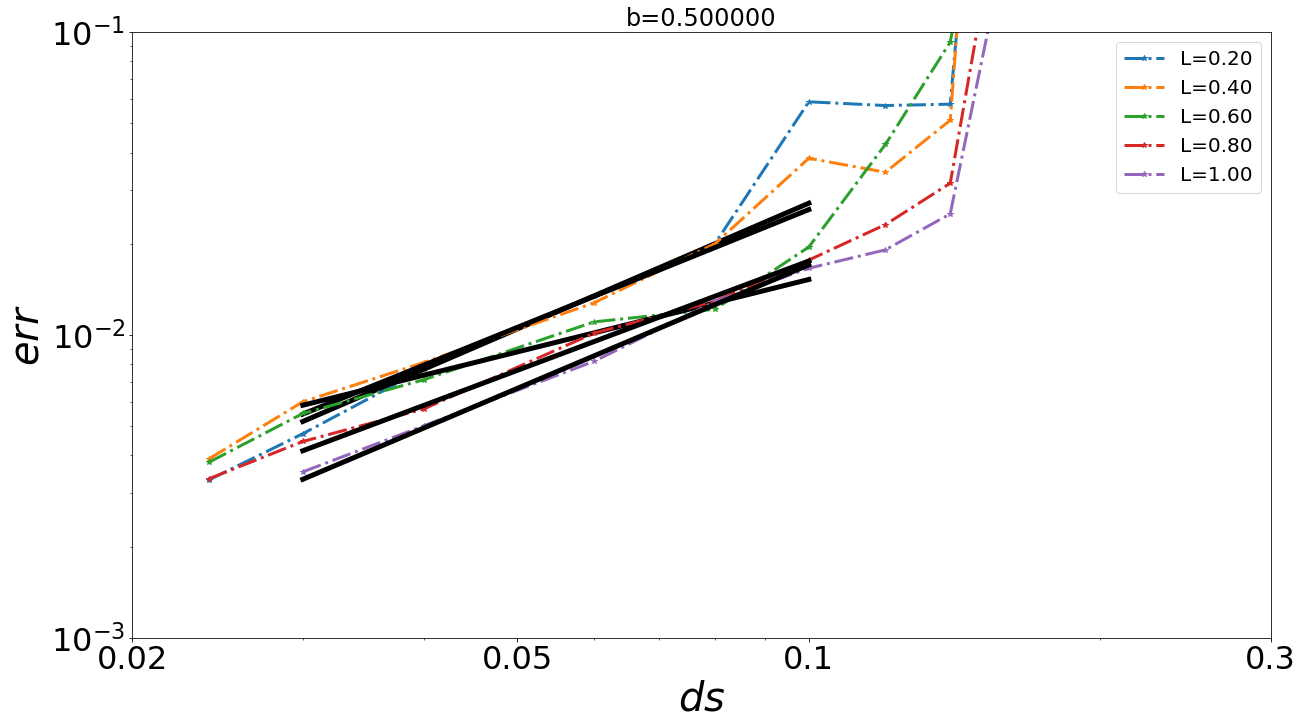

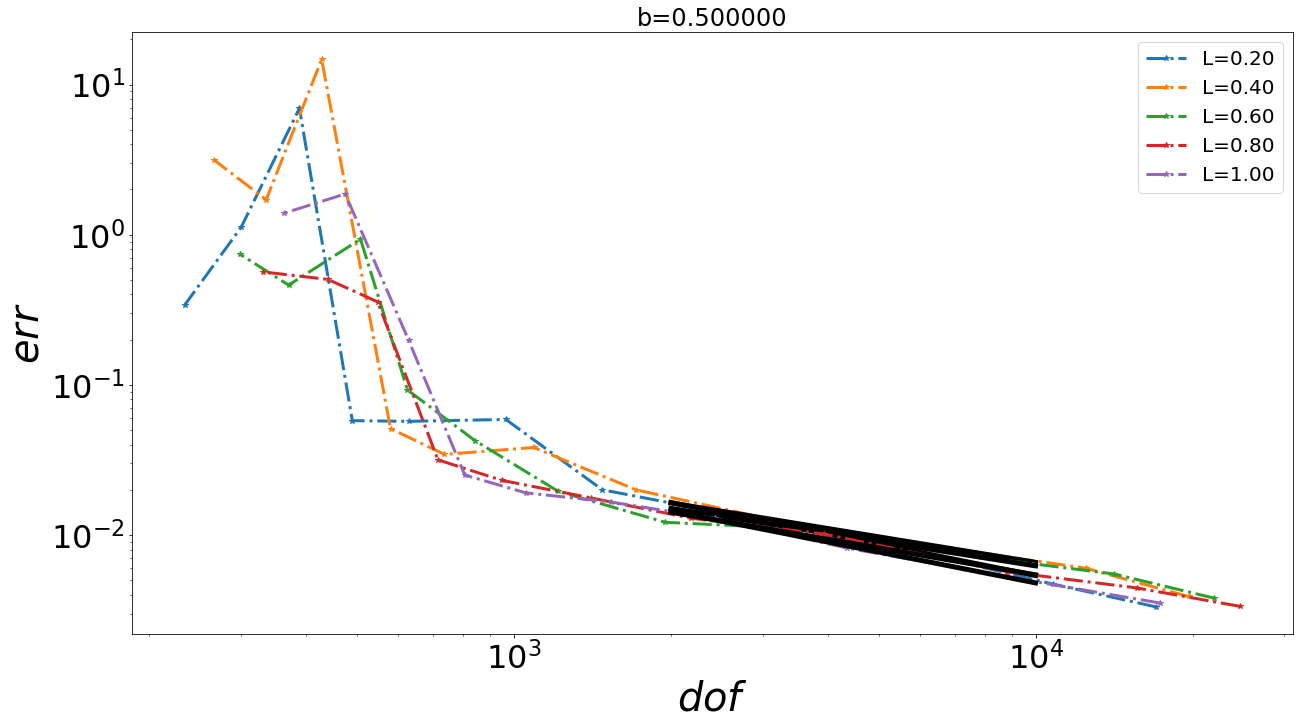

In [28]:
# ds-err
for bi in errx.columns[[5]]:
    t1 = errx[bi]
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    for Li in t1.index.levels[0][1:]:
        ty = t1.loc[Li]
        tx = ty.index
        ax1.loglog(tx, ty, '*-.', label='L=%.2f' % Li, linewidth=3)
        spf.fit_power_law(ax1, tx, ty, 0.03, 0.1, linestyle='-', linewidth=5)
    ax1.set_title('b=%f' % bi)
    ax1.legend()
    ax1.set_xlabel('$ds$', size=fontsize)
    ax1.set_ylabel('$err$', size=fontsize)
    ax1.set_xlim(0.02, 0.3)
    ax1.set_ylim(10**-3, 10**-1)
    xticks = (0.02, 0.05, 0.1, 0.3)
    ax1.xaxis.set_ticks(xticks)
    ax1.xaxis.set_ticklabels(xticks)
#     ax1.loglog((0.03, 0.1), (0.003, 10**((np.log10(0.1 / 0.03))*1.5 + np.log10(0.003))), 'b-', linewidth=5)
    plt.sca(ax1)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
    plt.tight_layout()
    
# nnode-err
for bi in errx.columns[[5]]:
    t1 = errx[bi]
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    for Li in t1.index.levels[0][1:]:
        ty = t1.loc[Li]
        tx = data_detail.loc[Li].nnode.values
        ax1.loglog(tx, ty, '*-.', label='L=%.2f' % Li, linewidth=3)
        spf.fit_power_law(ax1, tx, ty, 2000, 10**4, linestyle='-', linewidth=5)
    ax1.set_title('b=%f' % bi)
    ax1.legend()
    ax1.set_xlabel('$dof$', size=fontsize)
    ax1.set_ylabel('$err$', size=fontsize)
#     ax1.set_xlim(0.02, 0.3)
#     ax1.set_ylim(10**-3, 10**-1)
#     xticks = (0.02, 0.05, 0.1, 0.3)
#     ax1.xaxis.set_ticks(xticks)
#     ax1.xaxis.set_ticklabels(xticks)
#     ax1.loglog((0.03, 0.1), (0.003, 10**((np.log10(0.1 / 0.03))*1.5 + np.log10(0.003))), 'b-', linewidth=5)
    plt.sca(ax1)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
    plt.tight_layout()

In [98]:
# check convergence1

# get data 1
dir_name1 = 'test_L_ds'
dir_name2 = 'case1_v3c'
t_dir = os.path.join(PWD, dir_name1, dir_name2)
mat_list = glob.glob('%s/case1_L*_ds*_check_b*_u.mat' % t_dir)

L = []             # pipe length
ds = []            # delta length
b_list = []        # location of x_f
threshold = []     # cut of threshold
errx = []          # error of velocity
erry = []          # error of velocity
errz = []          # error of velocity
nnode = []         # amount of nodes

for mati in mat_list:
    mat_contents = loadmat(mati)
    kwargs = mat_contents['kwargs'][0, 0]
    Li, dsi, bi = scanf('case1_L%f_ds%f_check_b%f_u.mat', os.path.basename(mati))
    cthi = kwargs['th'][0]
    u11_ana = mat_contents['u11_ana']
    u21_ana = mat_contents['u21_ana']
    u31_ana = mat_contents['u31_ana']
    u11_num = mat_contents['u11_num']
    u21_num = mat_contents['u21_num']
    u31_num = mat_contents['u31_num']
    errxi = np.linalg.norm(u11_ana - u11_num, ord=2)
    erryi = np.linalg.norm(u21_ana - u21_num, ord=2)
    errzi = np.linalg.norm(u31_ana - u31_num, ord=2)
    
    L.append(Li)
    ds.append(dsi)
    b_list.append(bi)
    threshold.append(cthi)
    errx.append(errxi)
    erry.append(erryi)
    errz.append(errzi)
    
data_err = pd.DataFrame({'L': np.hstack(L), 
                         'ds': np.hstack(ds), 
                         'b': np.hstack(b_list), 
                         'cth': np.hstack(threshold),
                         'errx': np.hstack(errx), 
                         'erry': np.hstack(erry), 
                         'errz': np.hstack(errz), })\
               .pivot_table(index=['L', 'ds'], columns=['b'])
errx = data_err.errx
erry = data_err.erry
errz = data_err.errz

# get data 2
txt_names = glob.glob('%s/*.txt' % t_dir)
L = []             # pipe length
ds = []            # delta length
nnode = []         # amount of nodes
threshold = []     # cut of threshold

for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'pipe length:'
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    L.append(temp1)
    
    text_headle = 'delta length, epsilon and factor of pipe are'
    temp2 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    ds.append(temp2)
    
    text_headle = 'Stokeslets in pipe prepare, contain '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    nnode.append(temp1)
    
    text_headle = 'threshold of series is '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    threshold.append(temp1)

data_detail = pd.DataFrame({'L': np.hstack(L), 
                    'ds': np.hstack(ds), 
                    'nnode': np.hstack(nnode), 
                    'cth': np.hstack(threshold), })\
        .pivot_table(index=['L', 'ds'])
nnode = data_detail.nnode


slope=-1.501330 in range (15, 40)
slope=-1.087743 in range (15, 40)
slope=-1.009695 in range (15, 40)
slope=-1.204229 in range (15, 40)
slope=-1.212758 in range (15, 40)


/home/zhangji/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


slope=-0.695465 in range (2000, 10000)
slope=-0.565859 in range (2000, 10000)
slope=-0.547118 in range (2000, 10000)
slope=-0.595992 in range (2000, 10000)
slope=-0.683559 in range (2000, 10000)


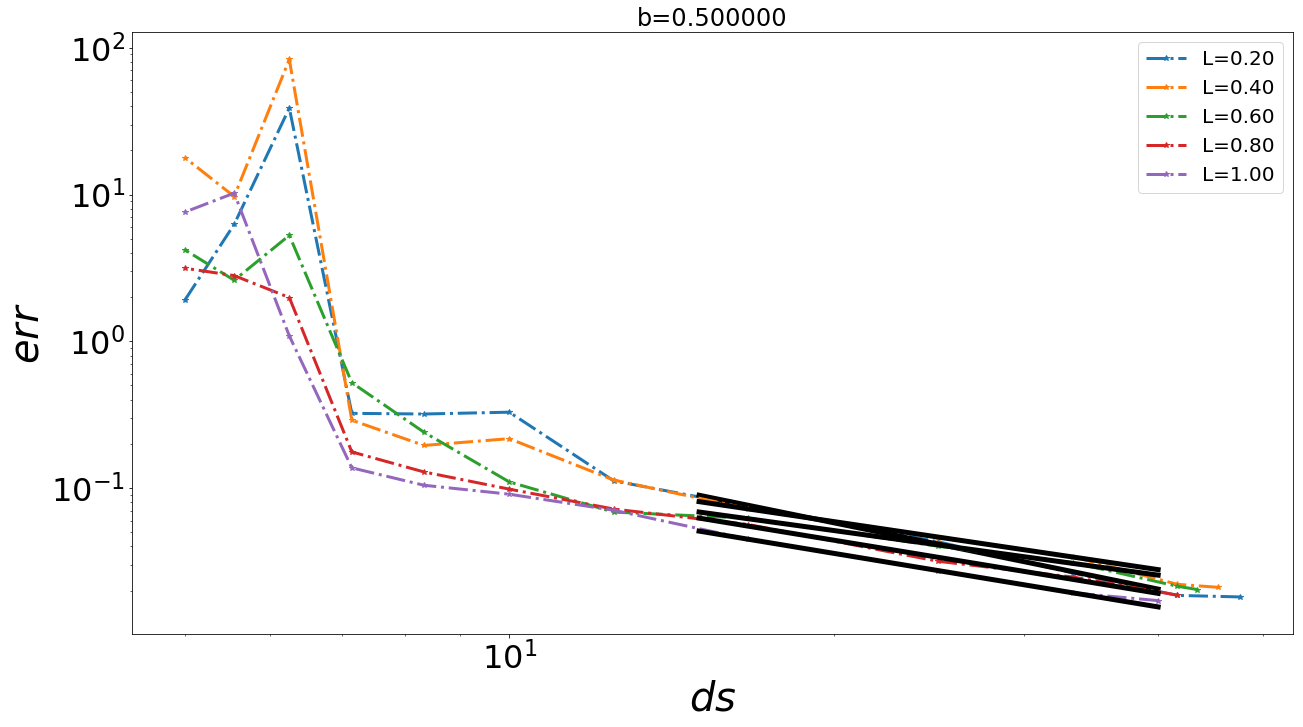

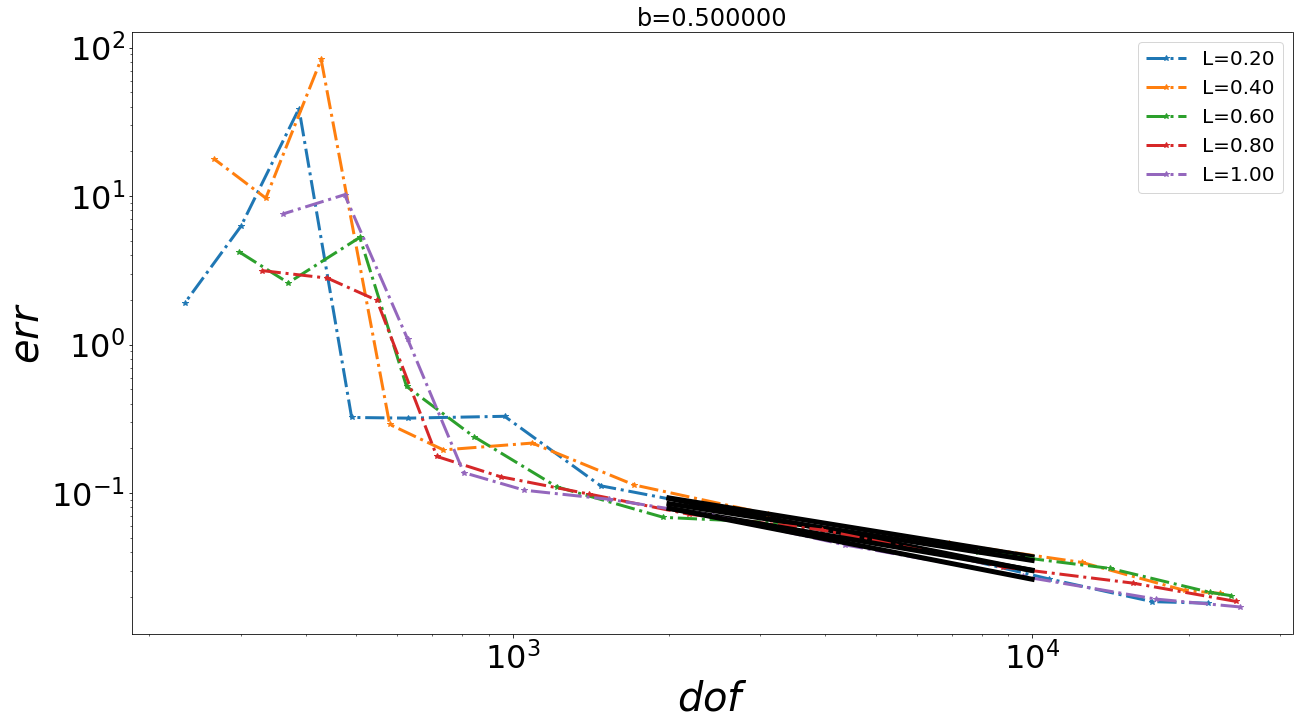

In [104]:
# ds-err
for bi in errx.columns[[5]]:
    t1 = errx[bi]
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    for Li in t1.index.levels[0][1:]:
        ty = t1.loc[Li]
#         tx = ty.index
#         ax1.loglog(tx, ty, '*-.', label='L=%.2f' % Li, linewidth=3)
#         spf.fit_power_law(ax1, tx, ty, 0.03, 0.1, linestyle='-', linewidth=5)
        tx = 1 / ty.index
        ax1.loglog(tx, ty, '*-.', label='L=%.2f' % Li, linewidth=3)
        spf.fit_power_law(ax1, tx, ty, 15, 40, linestyle='-', linewidth=5)
    ax1.set_title('b=%f' % bi)
    ax1.legend()
    ax1.set_xlabel('$ds$', size=fontsize)
    ax1.set_ylabel('$err$', size=fontsize)
#     ax1.set_xlim(0.02, 0.3)
#     ax1.set_ylim(10**-3, 10**-1)
#     xticks = (0.02, 0.05, 0.1, 0.3)
#     ax1.xaxis.set_ticks(xticks)
#     ax1.xaxis.set_ticklabels(xticks)
#     ax1.loglog((0.03, 0.1), (0.003, 10**((np.log10(0.1 / 0.03))*1.5 + np.log10(0.003))), 'b-', linewidth=5)
    plt.sca(ax1)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
    plt.tight_layout()
    
# nnode-err
for bi in errx.columns[[5]]:
    t1 = errx[bi]
    fig, ax1 = plt.subplots(nrows=1, ncols=1)
    fig.patch.set_facecolor('white')
    for Li in t1.index.levels[0][1:]:
        ty = t1.loc[Li]
        tx = data_detail.loc[Li].nnode.values
        ax1.loglog(tx, ty, '*-.', label='L=%.2f' % Li, linewidth=3)
        spf.fit_power_law(ax1, tx, ty, 2000, 10**4, linestyle='-', linewidth=5)
    ax1.set_title('b=%f' % bi)
    ax1.legend()
    ax1.set_xlabel('$dof$', size=fontsize)
    ax1.set_ylabel('$err$', size=fontsize)
#     ax1.set_xlim(0.02, 0.3)
#     ax1.set_ylim(10**-3, 10**-1)
#     xticks = (0.02, 0.05, 0.1, 0.3)
#     ax1.xaxis.set_ticks(xticks)
#     ax1.xaxis.set_ticklabels(xticks)
#     ax1.loglog((0.03, 0.1), (0.003, 10**((np.log10(0.1 / 0.03))*1.5 + np.log10(0.003))), 'b-', linewidth=5)
    plt.sca(ax1)
    plt.xticks(fontsize=fontsize*0.8)
    plt.yticks(fontsize=fontsize*0.8)
    plt.tight_layout()

In [106]:
x = np.arange(100)
y = x ** 2
idx = x > 33.5
x1 = x[idx]
print(x1)
y1 = y[idx]
print(y1)

[34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[1156 1225 1296 1369 1444 1521 1600 1681 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025
 3136 3249 3364 3481 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761 4900 5041 5184 5329 5476 5625 5776 5929
 6084 6241 6400 6561 6724 6889 7056 7225 7396 7569 7744 7921 8100 8281 8464 8649 8836 9025 9216 9409 9604 9801]
